In [11]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [2]:
#import
train_df = pd.read_csv("../Resources/2016_train.csv")
test_df = pd.read_csv("../Resources/2018_test.csv")

In [25]:
test_df

,Unnamed: 0,Unnamed: 0.1,Year,Location,CigaretteSmokingPrevalence,TobaccoSmokingPrevalence,TobaccoUsePrevalance,MostSoldBrandCigaretteCurrency,MostSoldBrandCigarettePrice,rates,MostSoldUSD
0,0,0,2018,Albania,43.3,50.5,50.5,All,240.0,0.009610,2.306400
1,1,1,2018,Algeria,11.1,14.5,18.8,DZD,300.0,0.007330,2.199000
2,2,2,2018,Andorra,27.7,33.8,33.8,EUR,3.6,1.168889,4.208000
3,3,3,2018,Austria,27.0,29.1,29.1,EUR,5.5,1.168889,6.428890
4,4,4,2018,Belgium,23.4,25.0,25.0,EUR,6.6,1.168889,7.714667
...,...,...,...,...,...,...,...,...,...,...,...
103,103,103,2018,Saudi Arabia,18.6,12.7,2.0,SAR,27.5,0.266681,7.333728
104,104,104,2018,Serbia,36.2,40.6,40.6,RSD,250.0,0.009941,2.485250
105,105,105,2018,Seychelles,31.0,35.3,35.3,SCR,117.0,0.075113,8.788221
106,106,106,2018,Sierra Leone,29.1,31.0,31.0,SLL,5000.0,0.000095,0.475000


In [4]:
#drop unnamed collumn
train_df = train_df.drop('Unnamed: 0', axis = 1)
train_df = train_df.drop('Unnamed: 0.1', axis = 1)
train_df

,Year,Location,CigaretteSmokingPrevalence,TobaccoSmokingPrevalence,TobaccoUsePrevalance,MostSoldBrandCigaretteCurrency,MostSoldBrandCigarettePrice,rates,MostSoldUSD
0,2016,Albania,43.7,51.1,51.1,All,230.00,0.009610,2.210300
1,2016,Algeria,11.2,14.7,19.1,DZD,210.00,0.007330,1.539300
2,2016,Andorra,27.9,33.9,33.9,EUR,3.50,1.168889,4.091112
3,2016,Austria,28.5,30.7,30.7,EUR,5.00,1.168889,5.844445
4,2016,Belgium,23.8,25.5,25.5,EUR,6.32,1.168889,7.387378
...,...,...,...,...,...,...,...,...,...
114,2016,Saudi Arabia,18.4,12.7,2.2,SAR,12.00,0.266681,3.200172
115,2016,Serbia,36.5,41.2,41.2,RSD,220.00,0.009941,2.187020
116,2016,Seychelles,31.4,35.9,36.0,SCR,105.00,0.075113,7.886865
117,2016,Sierra Leone,30.4,32.6,32.6,SLL,3500.00,0.000095,0.332500


In [26]:
test_df = test_df.drop('Unnamed: 0', axis = 1)
test_df = test_df.drop('Unnamed: 0.1', axis = 1)

In [19]:
train_df.loc[:, "CigaretteSmokingPrevalence"] = train_df.loc[:, "CigaretteSmokingPrevalence"].astype("int")
train_df.loc[:, "TobaccoSmokingPrevalence"] = train_df.loc[:, "TobaccoSmokingPrevalence"].astype("int")
train_df.loc[:, "TobaccoUsePrevalance"] = train_df.loc[:, "TobaccoUsePrevalance"].astype("int")

In [27]:
test_df.loc[:, "CigaretteSmokingPrevalence"] = test_df.loc[:, "CigaretteSmokingPrevalence"].astype("int")
test_df.loc[:, "TobaccoSmokingPrevalence"] = test_df.loc[:, "TobaccoSmokingPrevalence"].astype("int")
test_df.loc[:, "TobaccoUsePrevalance"] = test_df.loc[:, "TobaccoUsePrevalance"].astype("int")

In [28]:
X_train= train_df[["TobaccoSmokingPrevalence", "TobaccoUsePrevalance"]]
y_train = train_df["CigaretteSmokingPrevalence"]

print("Shape: ", X.shape, y.shape)

Shape:  (119, 2) (119,)


In [29]:
X_test = test_df[["TobaccoSmokingPrevalence", "TobaccoUsePrevalance"]]
y_test = test_df["CigaretteSmokingPrevalence"]

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [31]:
classifier.fit(X_train, y_train)

/Users/nikolajankovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.20168067226890757
Testing Data Score: 0.12037037037037036


In [33]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=1)
ran_for.fit(X_train, y_train)
print(f"Training Data Score: {ran_for.score(X_train, y_train)}")
print(f"Testing Data Score: {ran_for.score(X_test, y_test)}")

Training Data Score: 0.7478991596638656
Testing Data Score: 0.3148148148148148


In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
log_reg = LogisticRegression(solver= "lbfgs", random_state=1)
log_reg.fit(X_train_scaled, y_train)
print(f"Training Data Score: {log_reg.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {log_reg.score(X_test_scaled, y_test)}")

Training Data Score: 0.19327731092436976
Testing Data Score: 0.1388888888888889


In [38]:
ran_for = RandomForestClassifier(random_state=1, n_estimators=500)
ran_for.fit(X_train_scaled, y_train)
print(f"Training Data Score: {ran_for.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {ran_for.score(X_test_scaled, y_test)}")

Training Data Score: 0.7478991596638656
Testing Data Score: 0.3425925925925926


In [39]:
feature_importances = ran_for.feature_importances_

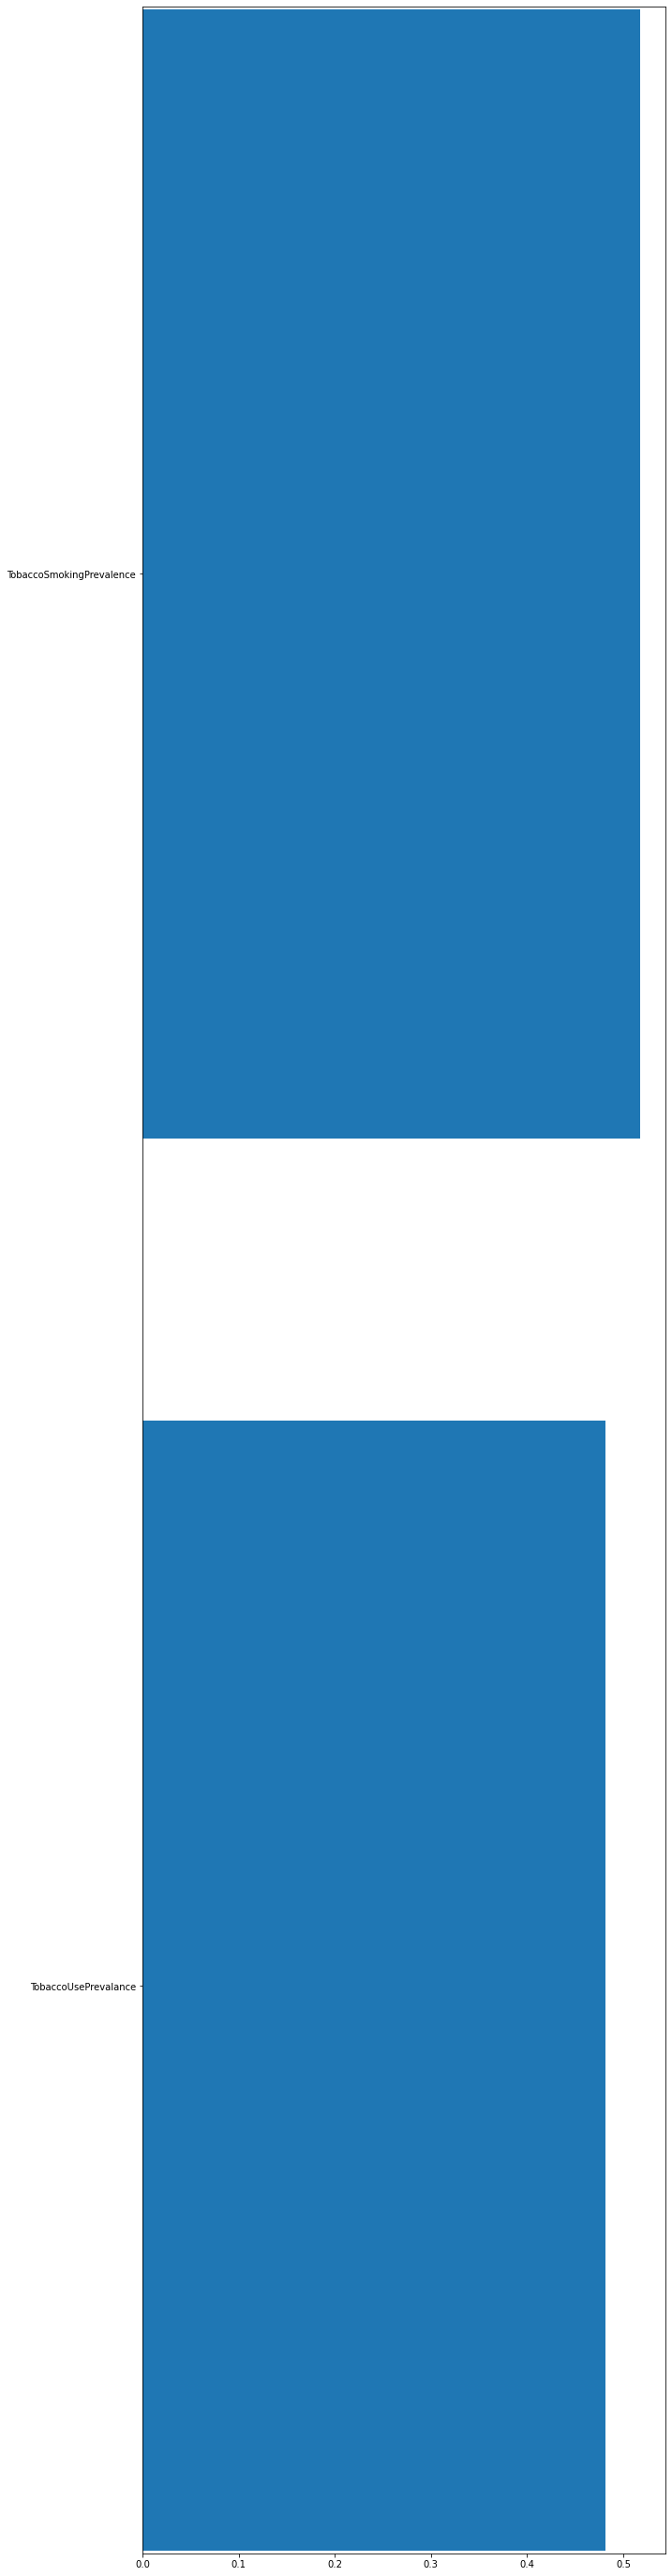

In [41]:
features = sorted(zip(X.columns, ran_for.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()